# Classification. Linear models and KNN

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 1: Titanic survival prediction

### Dataset

Read the description here: https://www.kaggle.com/c/titanic/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/titanic/overview/evaluation.  


In [3]:
PATH = "./data/"

In [4]:
data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

Sex
female    35.241302
male      64.758698
Name: Sex, dtype: float64
Sex
female    314
male      577
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Group pasangers by sex')

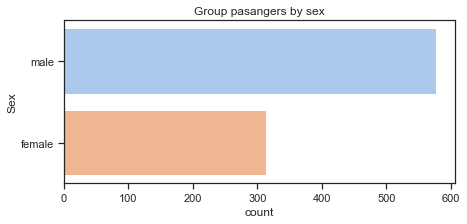

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
## percentage
print(data.groupby("Sex")['Sex'].count() / data['Sex'].count() * 100)

#absolute
print(data.groupby("Sex")['Sex'].count())

sns.set_theme(style="ticks", color_codes=True)

f, ax = plt.subplots(figsize=(7, 3))
d = sns.countplot(y="Sex", data=data, color="b",palette="pastel")
d.set_title('Group pasangers by sex')

    

% of women who survived: 0.7420382165605095
% of man who survived: 0.18890814558058924


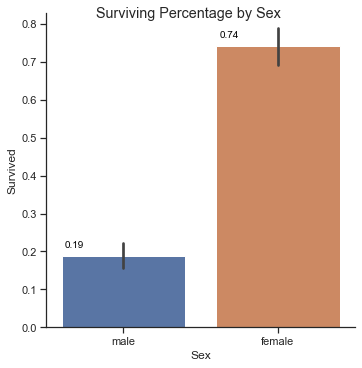

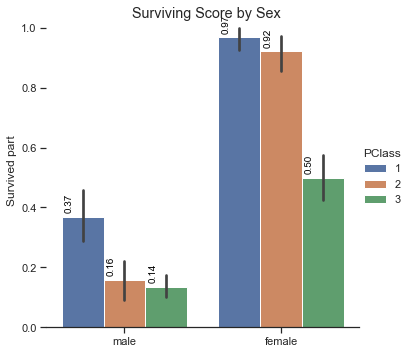

In [7]:
women = data.loc[data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

man = data.loc[data.Sex == 'male']["Survived"]
rate_man = sum(man)/len(man)

print("% of man who survived:", rate_man)

h = sns.catplot(x="Sex", y="Survived", kind="bar",  data=data)
h.fig.suptitle('Surviving Percentage by Sex')
ah = h.facet_axis(0,0)
for p in ah.patches:
    ah.text(p.get_x() + 0.02, 
            p.get_height() + 0.02, 
           '{0:.2f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')

g = sns.catplot(x="Sex", y="Survived", hue='Pclass', kind="bar",  data=data)
g.fig.suptitle('Surviving Score by Sex')
g.despine(left=True)
g.set_axis_labels("", "Survived part")
g.legend.set_title("PClass")
ag = g.facet_axis(0,0)
for p in ag.patches:
    ag.text(p.get_x() + 0.02, 
            p.get_height() + 0.02, 
           '{0:.2f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='vertical', 
            size='small')


According plots above female pasangers have greater change to be survived. Also Surviving score depends on class, it's greater for the first class.

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

Train data Age Average 29.69911764705882
Train data Age Median 28.0
Average for survived 28.343689655172415
Median for survived 28.0
Average for deceased 30.62617924528302
Median for deceased 28.0


Text(0.5, 0.98, 'Surviving by Age and PClass')

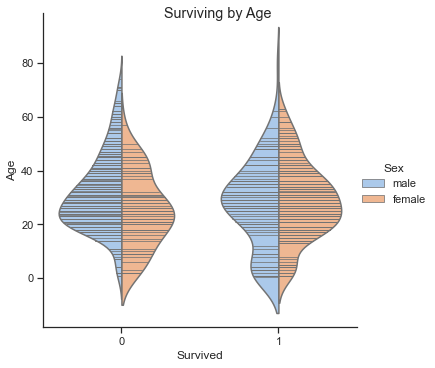

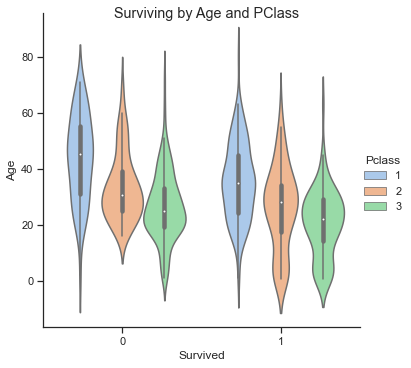

In [8]:
print(f"Train data Age Average {data['Age'].mean()}")
print(f"Train data Age Median {data['Age'].median()}")

print(f"Average for survived {data[data.Survived == 1]['Age'].mean()}")
print(f"Median for survived {data[data.Survived == 1]['Age'].median()}")

print(f"Average for deceased {data[data.Survived == 0]['Age'].mean()}")
print(f"Median for deceased {data[data.Survived == 0]['Age'].median()}")

qq = sns.catplot(x="Survived", y="Age", kind="violin", hue='Sex', inner="stick", palette="pastel", split=True, data=data)
qq.fig.suptitle('Surviving by Age')
qw = sns.catplot(x="Survived", y="Age", kind="violin", hue='Pclass', palette="pastel", data=data)
qw.fig.suptitle('Surviving by Age and PClass')

<b>Conclusion</b> According to plots more children and young people were survived. For example, in Pclass 2 the difference is the most obvious.

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

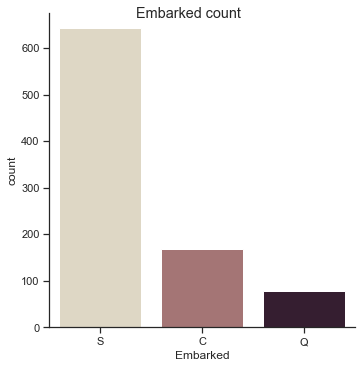

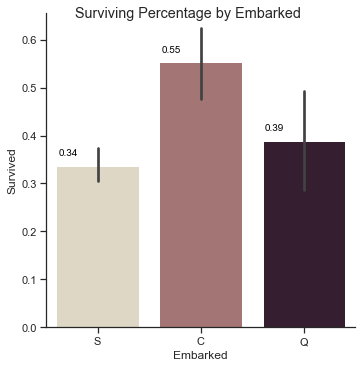

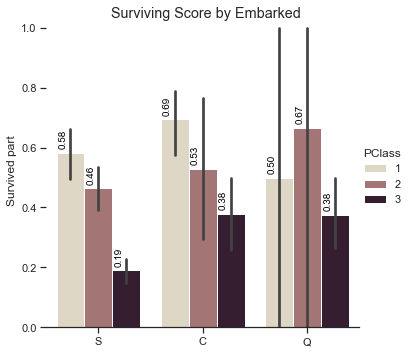

In [9]:
we= sns.catplot(x="Embarked", kind="count", palette="ch:.33", data=data)
we.fig.suptitle('Embarked count')


qh = sns.catplot(x="Embarked", y="Survived", kind="bar", data=data, palette="ch:.33")
qh.fig.suptitle('Surviving Percentage by Embarked')
ahh = qh.facet_axis(0,0)
for p in ahh.patches:
    ahh.text(p.get_x() + 0.02, 
            p.get_height() + 0.02, 
           '{0:.2f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')
    
    
g2 = sns.catplot(x="Embarked", y="Survived", hue='Pclass', kind="bar", data=data, palette="ch:.33")
g2.fig.suptitle('Surviving Score by Embarked')
g2.despine(left=True)
g2.set_axis_labels("", "Survived part")
g2.legend.set_title("PClass")
ag2 = g2.facet_axis(0,0)
for p in ag2.patches:
    ag2.text(p.get_x() + 0.02, 
            p.get_height() + 0.02, 
           '{0:.2f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='vertical', 
            size='small')
    

The most part of pasengers have port S, but in terms of percentage, the highest surviving percentage calculated for embarkation port C.

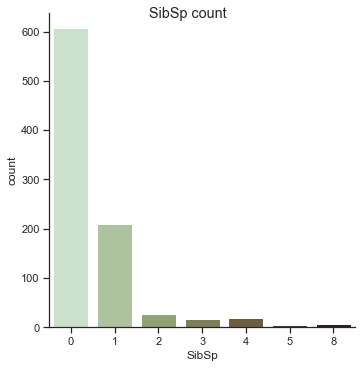

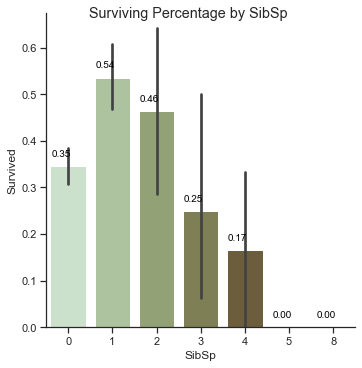

In [10]:
#Additional plots for better undestending features
we= sns.catplot(x="SibSp", kind="count", palette="ch:.88", data=data)
we.fig.suptitle('SibSp count')


qh = sns.catplot(x="SibSp", y="Survived", kind="bar", data=data, palette="ch:.88")
qh.fig.suptitle('Surviving Percentage by SibSp')
ahh = qh.facet_axis(0,0)
for p in ahh.patches:
    ahh.text(p.get_x() + 0.02, 
            p.get_height() + 0.02, 
           '{0:.2f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')

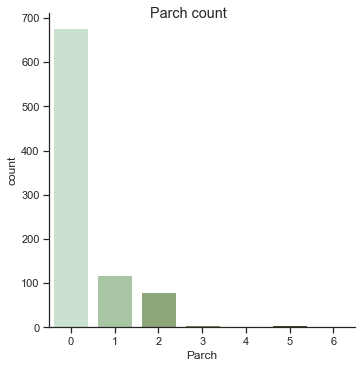

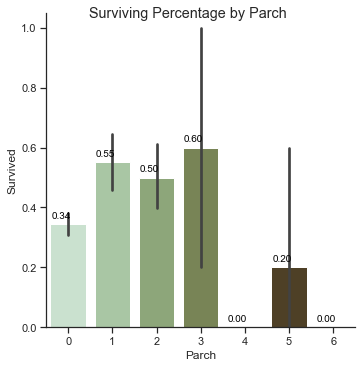

In [11]:
we= sns.catplot(x="Parch", kind="count", palette="ch:.99", data=data)
we.fig.suptitle('Parch count')


qh = sns.catplot(x="Parch", y="Survived", kind="bar", data=data, palette="ch:.99")
qh.fig.suptitle('Surviving Percentage by Parch')
ahh = qh.facet_axis(0,0)
for p in ahh.patches:
    ahh.text(p.get_x() + 0.02, 
            p.get_height() + 0.02, 
           '{0:.2f}'.format(p.get_height()),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='small')

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [109]:
## please check that tabulate installed on your environment
from tabulate import tabulate

top = 10
print(tabulate(
    sorted(list(zip(data.columns, data.isnull().sum(), data.isnull().sum() / data.shape[0] * 100)), key=lambda x: -x[2])[:top], 
    headers=['col_name', 'null_cnt', 'null_perc']))

col_name      null_cnt    null_perc
----------  ----------  -----------
Cabin              687    77.1044
Age                177    19.8653
Embarked             2     0.224467
Survived             0     0
Pclass               0     0
Name                 0     0
Sex                  0     0
SibSp                0     0
Parch                0     0
Ticket               0     0


<b>My thoughts</b>
Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

Only three columns have missing values (Cabin, Age, Embarked)
In general case I would like to recommend following:
- For the Age column I propose to use median values. Median value is tha same for survived and deceased. It's expected to decrease negative influence to prediction.
- Proposal for Embarked to drop null values, because of null values are only 0.22 percents (2 rows).
- Proposal for Cabin - to drop feature at all. I don't excect any dependency betweeen cabin number and survival.

But in our case, I assume, dropping values may have impact to submition results on kaggle, that's reason why I will try to replace NULL in Embarked with 'C', as the most often value, and nulls in Age with Median.

In [199]:
from sklearn import preprocessing

mod_data = data.copy()
mod_data['Age'].fillna(mod_data['Age'].median(), inplace=True)
mod_data['Embarked'].fillna(value = 'Q', inplace=True)
mod_data = mod_data.dropna(subset=['Age'])
mod_data = mod_data.dropna(subset=['Embarked'])
mod_data.reset_index()


mod_data['Sex'] = mod_data['Sex'].replace(['female'],'1').replace(['male'],'0')
mod_data['Embarked'] = mod_data['Embarked'].replace(['C'],'0').replace(['Q'],'1').replace(['S'],'2')

## your code
mod_data = mod_data.drop(columns=['Cabin', 'Ticket', 'Name'])
mod_data

top = 10
print(tabulate(
    sorted(list(zip(mod_data.columns, mod_data.isnull().sum(), mod_data.isnull().sum() / mod_data.shape[0] * 100)), key=lambda x: -x[2])[:top], 
    headers=['col_name', 'null_cnt', 'null_perc']))

col_name      null_cnt    null_perc
----------  ----------  -----------
Survived             0            0
Pclass               0            0
Sex                  0            0
Age                  0            0
SibSp                0            0
Parch                0            0
Fare                 0            0
Embarked             0            0


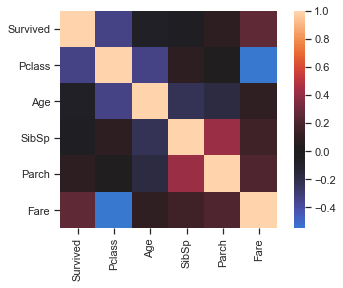

In [200]:
from seaborn import heatmap

heatmap(mod_data.corr(method='pearson'), center=0, square=True)
plt.show()

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [201]:
#sounce data was changed to modified version
y = mod_data['Survived']
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

<b>Select features for X</b>

In [202]:
feature_cols = ['Pclass', 'Fare', 'Sex', 'SibSp']
X = mod_data[feature_cols].values

Working with test data

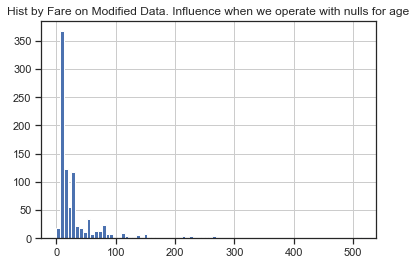

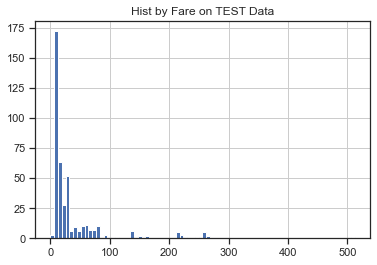

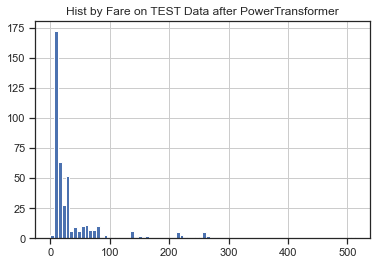

In [203]:

#get test data for futute prediction
data_test = pd.read_csv(os.path.join(PATH, 'titanic', 'test.csv')).set_index('PassengerId')

mod_data.hist(column='Fare', bins=80)
plt.title('Hist by Fare on Modified Data. Influence when we operate with nulls for age')


#working with column with the same way as for train
data_test['Fare'].fillna(data_test['Fare'].median(), inplace=True)

data_test.hist(column='Fare', bins=80)
plt.title('Hist by Fare on TEST Data')
plt.show()

data_test['Age'].fillna(data_test['Age'].median(), inplace=True)
data_test['Embarked'].fillna(value = 'Q', inplace=True)
data_test['Sex'] = data_test['Sex'].replace(['female'],'1').replace(['male'],'0')
data_test['Embarked'] = data_test['Embarked'].replace(['C'],'0').replace(['Q'],'1').replace(['S'],'2')


#prepare feature set
X_test =  data_test[feature_cols].values

data_test.hist(column='Fare', bins=80)
plt.title('Hist by Fare on TEST Data after PowerTransformer')
plt.show()

<b>LogReg</b>

In [205]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', penalty='l1', C=5)
logreg.fit(X, y)
#value_data[new_features].values
mod_data['Survived_pred'] = logreg.predict(X)
y_pred = mod_data['Survived_pred'] 
y_pred

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

print('Result modified data with accuracy_score {0}'.format(accuracy_score(y, y_pred)))

print('Cross validation result on original data: {:f}'.format(cross_val_score(logreg, X, y, 
                      scoring='accuracy', cv=30).mean()))

Result modified data with accuracy_score 0.7957351290684624
Cross validation result on original data: 0.794598


In [206]:
#predict
data_test['Survived_logreg'] = logreg.predict(X_test)
y_pred_test = data_test['Survived_logreg']
y_pred_test


PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived_logreg, Length: 418, dtype: int64

In [207]:
print('Accurancy results after prediction with cross-validation {0}'.format(cross_val_score(logreg, X_test, y_pred_test, scoring='accuracy', cv=30).mean()) +'\n')

Accurancy results after prediction with cross-validation 0.9976190476190477



<b>KNN</b>

In [208]:
#KNN with different N
from sklearn.neighbors import KNeighborsClassifier

# make an instance of a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)
print(knn)
knn.fit(X, y)

mod_data['Survived_knn_pred1'] = knn.predict(X)
data_test['Survived_knn_pred1'] = knn.predict(X_test)
y_pred_knn1 = mod_data['Survived_knn_pred1']
y_test_pred_knn1 = data_test['Survived_knn_pred1']

print('Result modified data with accuracy_score KNN=1 {0}'.format(accuracy_score(y, y_pred_knn1)))
print('Accurancy results after prediction with cross-validation {0}'.format(cross_val_score(knn, X_test, y_test_pred_knn1, scoring='accuracy', cv=5).mean()) +'\n')


# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
mod_data['Survived_knn_pred5'] = knn.predict(X)
data_test['Survived_knn_pred5'] = knn.predict(X_test)
y_pred_knn5 = mod_data['Survived_knn_pred5']
y_test_pred_knn5 = data_test['Survived_knn_pred5']

print('Result modified data with accuracy_score KNN=5 {0}'.format(accuracy_score(y, y_pred_knn5)))
print('Accurancy results after prediction with cross-validation {0}'.format(cross_val_score(knn, X_test, y_test_pred_knn5, scoring='accuracy', cv=5).mean()) +'\n')

data_test[['Survived_knn_pred5']].to_csv('ticanic_prediction_knn5.csv')
data_test[['Survived_knn_pred1']].to_csv('ticanic_prediction_knn1.csv')


KNeighborsClassifier(n_neighbors=1)
Result modified data with accuracy_score KNN=1 0.8832772166105499
Accurancy results after prediction with cross-validation 0.8611876075731498

Result modified data with accuracy_score KNN=5 0.8372615039281706
Accurancy results after prediction with cross-validation 0.8708261617900173



**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

In [209]:
#try the same with Scaling  and another LogisticRegression params
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
main_model = LogisticRegression(solver='liblinear', penalty='l1')
p = make_pipeline(main_model)
p.fit(X, y)
p1_sc = p.score(X, y)

pipe_baseline = make_pipeline(MinMaxScaler(), main_model)
pipe_baseline.fit(X, y)
pipe_baseline_score = pipe_baseline.score(X, y)

data_test['Survived'] = pipe_baseline.predict(X_test)


print(f'Raw data accuracy: \t\t {p1_sc}')
print(f'Scaled data accuracy: \t\t {pipe_baseline_score}\n')


print('Cross validation result on original data: {:f}'.format(cross_val_score(main_model, X, y, 
                      scoring='accuracy', cv=10).mean()))

print('Cross validation result on scaled data: {:f}'.format(cross_val_score(pipe_baseline, X, y, 
                      scoring='accuracy', cv=10).mean()))

Raw data accuracy: 		 0.7957351290684624
Scaled data accuracy: 		 0.7934904601571269

Cross validation result on original data: 0.794582
Cross validation result on scaled data: 0.794594


In [210]:
#Trying Scaling on KNN
from sklearn.preprocessing import StandardScaler
feature_cols_1 = ['Pclass', 'Fare', 'Sex', 'Embarked', 'SibSp']
X_knn = mod_data[feature_cols_1].values
X_test_knn =  data_test[feature_cols_1].values
y_knn = mod_data['Survived']

scaler = StandardScaler()
scaler.fit(X_knn)

X_train_sc_knn = scaler.transform(X_knn)
X_test_sc_knn = scaler.transform(X_test_knn)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train_sc_knn, y_knn)

mod_data['Survived_pred_sc_knn2'] = knn2.predict(X_train_sc_knn)
data_test['Survived_pred_sc_knn2'] = knn2.predict(X_test_sc_knn)
y_pred_knn2 = mod_data['Survived_pred_sc_knn2']
y_test_knn2 = data_test['Survived_pred_sc_knn2']

print('Result modified data with accuracy_score KNN_2 {0}'.format(accuracy_score(y_knn, y_pred_knn2)))
print('Accurancy results after prediction with cross-validation {0}'.format(cross_val_score(knn, X_test_sc_knn, y_test_knn2, scoring='accuracy', cv=5).mean()) +'\n')

data_test[['Survived_pred_sc_knn2']].to_csv('ticanic_prediction_knn_sc_2.csv')

Result modified data with accuracy_score KNN_2 0.8630751964085297
Accurancy results after prediction with cross-validation 0.9234652897303499



Load the test set and make the predictions. Submit them to kaggle and see the results :)
Select the best model, load the test set and make the predictions. Submit them to kaggle.

**Note**. X points will depend on your kaggle leaderboard score.
$$ f(score) = 0.5, \ \ 0.76 \leq score < 0.78,$$
$$ f(score) = 1.0, \ \ 0.78 \leq score < 0.81,$$ 
$$ f(score) = 2.5, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.

In [211]:
# my results
data_test[['Survived']].to_csv('ticanic_prediction_for_kaggle.csv')
data_test[['Survived_logreg']].to_csv('ticanic_prediction_lg_simple.csv')

#my best score on kaggle is 0.77272
#Andrey Karotki

![image](titanic_kaggle.jpg) 

![image](leaderboard_titanic.jpg) 

## Part 2: Porto Seguro’s Safe Driver Prediction

Let's build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.
Read the detailed description and download the dataset https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data. Put the data into *./data/porto/*.

In [25]:
insurance_data = pd.read_csv(os.path.join(PATH, 'porto', 'train.csv')).set_index('id')

In [26]:
insurance_data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


Let's skip EDA for now. We'll use SGDClassifier and build a simple baseline: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html.
Note that loss='log' gives logistic regression.

In [27]:
y = insurance_data['target']
X = insurance_data.drop(columns=['target'])
print('Done')

Done


In [28]:
numeric_features = [column for column in X if not (column.endswith("cat") or column.endswith("bin"))]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in X if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))])

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
clf = pipeline.fit(X_train, y_train)

We'll calculate the model accuracy:

In [31]:
accuracy_score(y_true=y_valid, y_pred=clf.predict(X_valid))

0.9631224658945812

Wow! Our model gets ~0.963 accuracy! But is it really good?...

Let's plot the confusion matrix and analyze the errors.

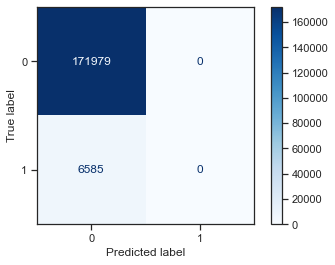

In [32]:
disp = plot_confusion_matrix(clf, X_valid, y_valid,
                             cmap=plt.cm.Blues,
                             normalize=None)

Well, it turns out that our model is completely useless. Let's calculate some basic statistics:

In [33]:
insurance_data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you see, there are less than 4% of positive examples, so we have to deal with a highly imbalanced dataset.

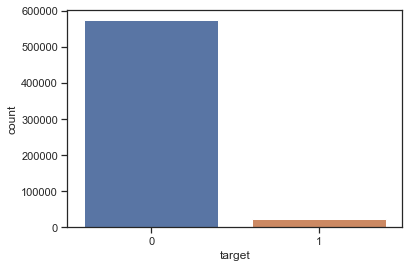

In [34]:
sns.countplot(x='target', data=insurance_data)
plt.show()

Accuracy is not informative here and the Normalized Gini Coefficient will be used instead: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/evaluation.

In [35]:
# Code for calculating Normalized gini coefficient
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):  
    assert(len(actual) == len(pred))  
    epsilon = 1e-7
    values = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)  
    values = values[np.lexsort((values[:, 2], -1 * values[:, 1]))]  
    total = values[:, 0].sum() 
    gini_sum = (values[:, 0].cumsum().sum() + epsilon) / (total + epsilon)  
  
    gini_sum -= (len(actual) + 1) / 2  
    return gini_sum / len(actual)  
  
def gini_normalized(a, p):  
    '''Function to calculate the normalized gini coefficient'''
    return gini(a, p) / gini(a, a)

**(1.5 points)** Prove that the **Normalized Gini Coefficient** is equivalent to **2 x AUC - 1** :

The Gini Coefficient is the summary statistic of the Cumulative Accuracy Profile (CAP) chart. It is calculated as the quotient of the area which the CAP curve and diagonal enclose and the corresponding area in an ideal rating procedure.

Area Under Receiver Operating Characteristic curve or ROC AUC is the summary statistic of the ROC curve chart.

<b>Detailed proof information you can find using following link in Russian</b></br>

1. Коэффициент Джини. Из экономики в машинное обучение https://habr.com/ru/company/ods/blog/350440/

2. Знакомьтесь, Джини https://dyakonov.org/2015/12/15/%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%BC%D1%8C%D1%82%D0%B5%D1%81%D1%8C-%D0%B4%D0%B6%D0%B8%D0%BD%D0%B8/

3. GINI, CUMULATIVE ACCURACY PROFILE, AUC https://www.listendata.com/2019/09/gini-cumulative-accuracy-profile-auc.html

I don't see any sence to copy-past proof information from pages above to this notebbok.

**(0.5 points)** By the way, what other metrics could you suggest for this problem?

In common my recomendation to look closely to <b>precision</b> , <b>recall</b> and F1-score as combination of recall and precision. Following metrics should better reprecent real prediction odds. 
I suppose, for the porto dataset F1-Score can be really applicable.

https://en.wikipedia.org/wiki/F-score

Let's calculate the Normalized Gini Coefficient:

In [36]:
y_pred = clf.predict_proba(X_valid)[:, 1]

In [37]:
gini_normalized(y_valid, y_pred)

0.2558723581569817

**(0.5 points + Y bonus points)** Try different approaches: oversampling / undersampling, careful feature analysis and feature engineering, etc., to get a reasonable pipeline and improve the model quality. Use cross-validation for model evaluation.

Select the best model, load the test set and make the predictions. Submit them to kaggle.
Y bonus points will be calculated as $\frac{round(200 * \max(score - 0.253, 0))}{2}$, where *score* is your kaggle leaderboard score.

Note: do not use any classification models which have not been covered in the lessons yet.

In [38]:
top = 20
print(tabulate(
    sorted(list(zip(insurance_data.columns, insurance_data.isnull().sum(), insurance_data.isnull().sum() / insurance_data.shape[0] * 100)), key=lambda x: -x[2])[:top], 
    headers=['col_name', 'null_cnt', 'null_perc']))

col_name         null_cnt    null_perc
-------------  ----------  -----------
target                  0            0
ps_ind_01               0            0
ps_ind_02_cat           0            0
ps_ind_03               0            0
ps_ind_04_cat           0            0
ps_ind_05_cat           0            0
ps_ind_06_bin           0            0
ps_ind_07_bin           0            0
ps_ind_08_bin           0            0
ps_ind_09_bin           0            0
ps_ind_10_bin           0            0
ps_ind_11_bin           0            0
ps_ind_12_bin           0            0
ps_ind_13_bin           0            0
ps_ind_14               0            0
ps_ind_15               0            0
ps_ind_16_bin           0            0
ps_ind_17_bin           0            0
ps_ind_18_bin           0            0
ps_reg_01               0            0


In [39]:
# insurance_data_test = pd.read_csv(os.path.join(PATH, 'porto', 'test.csv')).set_index('id')